# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
# Your code here :
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming the dataset is loaded into a DataFrame called `df`
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset loading method

# Define X (features) and y (target variable)
X = data.drop(columns=['MEDV'])  # Drop the target variable 'MEDV' from features
y = data['MEDV']  # Target variable is 'MEDV'

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
# Your code here :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions on both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print the predictions for the training set and testing set
print("Predictions on the training set:")
print(y_train_pred)

print("\nPredictions on the testing set:")
print(y_test_pred)

# Optionally, evaluate the model performance
# Calculate the Mean Squared Error (MSE) and R^2 Score for both the training and testing sets

# Training set performance
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing set performance
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nModel performance on the training set:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R^2 Score: {r2_train}")

print("\nModel performance on the testing set:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R^2 Score: {r2_test}")


Predictions on the training set:
[10.96952405 19.41196567 23.06419602 12.1470648  18.3738116  25.24677946
 20.77024774 23.90932632  7.81713319 19.60988098 21.8202963  27.59615864
 32.67986504 15.12308446 35.3964561  12.99688651 20.728181   28.30223542
 15.61724836 24.45143096  4.61794591 23.76681932 25.56178249 22.98928526
 24.5213025  34.06407919 19.71166707 39.11233072 14.62515846 24.81139885
 18.02332883 20.85836445  9.57577261 20.87246835 22.28583096 31.79327155
 31.04748307 15.70611763 17.01382935 28.23332703 24.27661276 16.88670215
  6.90720745 26.75808901 22.586493   17.53664716 13.77197016 41.04840929
 16.44690754 18.23531669 25.37038646 23.64581399 22.05322581 20.83620499
 16.93508273 22.797579   29.13333934  7.69310515 24.60571452 17.2358028
 21.10846551 25.15150324 27.33394823 21.30494963 41.5811902  19.19666651
 15.37955448 19.33545877 17.04687638 22.96801532 23.11094953 33.6977586
 22.77436405 20.28968381 25.35517813 31.02479125 33.05103792 28.44712333
  8.50926331  5.6122

## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
# Your code here :
from sklearn.metrics import r2_score

# Calculate R-squared for the training set
r2_train = r2_score(y_train, y_train_pred)

# Calculate R-squared for the testing set
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared values
print(f"R-squared for the training set: {r2_train}")
print(f"R-squared for the testing set: {r2_test}")


R-squared for the training set: 0.7508856358979673
R-squared for the testing set: 0.6687594935356326


## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
# Your code here :
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the testing set
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE values
print(f"Mean Squared Error (MSE) for the training set: {mse_train}")
print(f"Mean Squared Error (MSE) for the testing set: {mse_test}")


Mean Squared Error (MSE) for the training set: 21.641412753226312
Mean Squared Error (MSE) for the testing set: 24.291119474973478


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [10]:
# Your code here :
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for the testing set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the MAE values
print(f"Mean Absolute Error (MAE) for the training set: {mae_train}")
print(f"Mean Absolute Error (MAE) for the testing set: {mae_test}")


Mean Absolute Error (MAE) for the training set: 3.314771626783229
Mean Absolute Error (MAE) for the testing set: 3.1890919658878416


## Classification Model Evaluation

In [12]:
from sklearn.datasets import load_iris
data = load_iris()

In [13]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [14]:
column_names = data.feature_names

In [15]:
df = pd.DataFrame(data['data'],columns=column_names)

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
target = pd.DataFrame(data.target)

In [18]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [20]:
# Your code here :
# Split the data into features (X) and target (y)
X = df
y = target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")

Training feature set shape: (120, 4)
Testing feature set shape: (30, 4)
Training target set shape: (120, 1)
Testing target set shape: (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [21]:
# Your code here :
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to flatten the target labels

# Generate predictions on the training set
y_train_pred = model.predict(X_train)

# Generate predictions on the testing set
y_test_pred = model.predict(X_test)

# Print accuracy on both the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")


Training accuracy: 0.975
Testing accuracy: 1.0


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [22]:
# Your code here :
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")


Training accuracy: 0.975
Testing accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [23]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy for the training set
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

# Calculate the balanced accuracy for the testing set
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print the balanced accuracy scores
print(f"Training balanced accuracy: {train_balanced_accuracy}")
print(f"Testing balanced accuracy: {test_balanced_accuracy}")


Training balanced accuracy: 0.975609756097561
Testing balanced accuracy: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [24]:
# Your code here :
from sklearn.metrics import precision_score

# Calculate the precision for the training set (micro average)
train_precision = precision_score(y_train, y_train_pred, average='micro')

# Calculate the precision for the testing set (micro average)
test_precision = precision_score(y_test, y_test_pred, average='micro')

# Print the precision scores
print(f"Training precision: {train_precision}")
print(f"Testing precision: {test_precision}")


Training precision: 0.975
Testing precision: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [25]:
# Your code here :
from sklearn.metrics import recall_score

# Calculate the recall for the training set (micro average)
train_recall = recall_score(y_train, y_train_pred, average='micro')

# Calculate the recall for the testing set (micro average)
test_recall = recall_score(y_test, y_test_pred, average='micro')

# Print the recall scores
print(f"Training recall: {train_recall}")
print(f"Testing recall: {test_recall}")


Training recall: 0.975
Testing recall: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [26]:
# Your code here :
from sklearn.metrics import f1_score

# Calculate the F1 score for the training set (micro average)
train_f1 = f1_score(y_train, y_train_pred, average='micro')

# Calculate the F1 score for the testing set (micro average)
test_f1 = f1_score(y_test, y_test_pred, average='micro')

# Print the F1 scores
print(f"Training F1 score: {train_f1}")
print(f"Testing F1 score: {test_f1}")


Training F1 score: 0.975
Testing F1 score: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

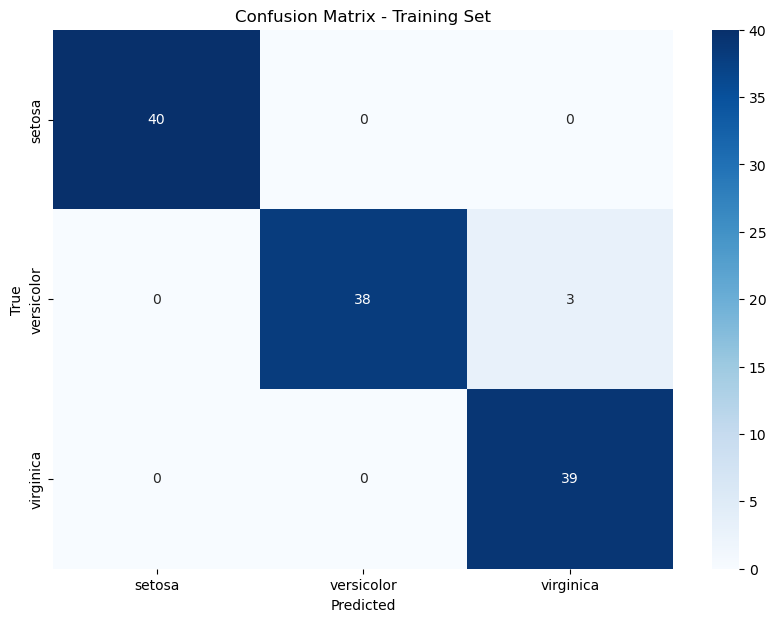

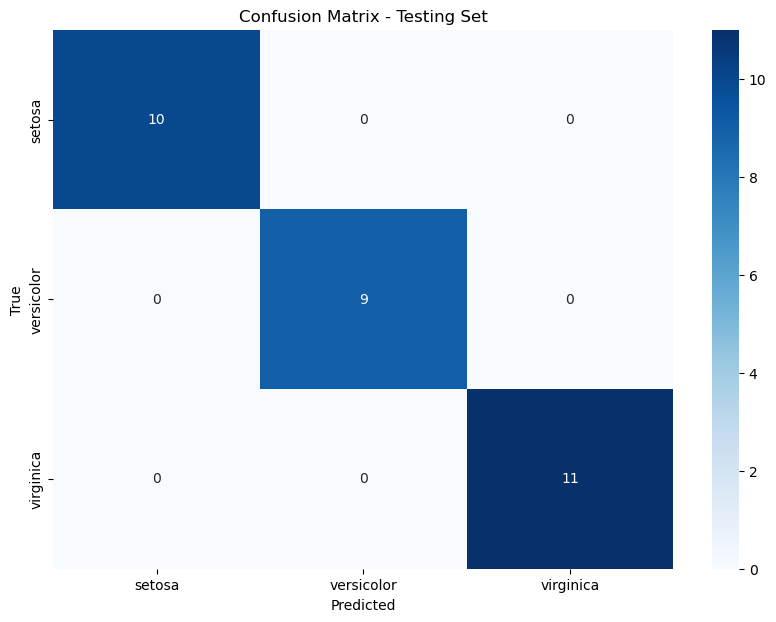

In [27]:
# Your code here :
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Generate confusion matrix for the testing set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(10,7))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(10,7))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [28]:
# Have fun here !
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# List of models to try
models = [
    ("Logistic Regression", LogisticRegression(max_iter=200)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC()),
    ("Naive Bayes", GaussianNB())
]

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training and testing set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')
    
    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')
    
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')
    
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    # Store the results
    results[model_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1': train_f1,
        'Test F1': test_f1,
        'Train Confusion Matrix': train_conf_matrix,
        'Test Confusion Matrix': test_conf_matrix
    }

# Displaying results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"Training Accuracy: {metrics['Train Accuracy']}")
    print(f"Testing Accuracy: {metrics['Test Accuracy']}")
    print(f"Training Precision: {metrics['Train Precision']}")
    print(f"Testing Precision: {metrics['Test Precision']}")
    print(f"Training Recall: {metrics['Train Recall']}")
    print(f"Testing Recall: {metrics['Test Recall']}")
    print(f"Training F1 Score: {metrics['Train F1']}")
    print(f"Testing F1 Score: {metrics['Test F1']}")
    print(f"Training Confusion Matrix:\n {metrics['Train Confusion Matrix']}")
    print(f"Testing Confusion Matrix:\n {metrics['Test Confusion Matrix']}")
    print("\n" + "="*50 + "\n")


Results for Logistic Regression:
Training Accuracy: 0.975
Testing Accuracy: 1.0
Training Precision: 0.975
Testing Precision: 1.0
Training Recall: 0.975
Testing Recall: 1.0
Training F1 Score: 0.975
Testing F1 Score: 1.0
Training Confusion Matrix:
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Testing Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Results for Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training F1 Score: 1.0
Testing F1 Score: 1.0
Training Confusion Matrix:
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
Testing Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Results for Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training F1 Score: 1.0
Testing F1 Score: 1.0
Training Confusion Matrix:
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
Testing Confusion Matrix:
 [[10  0  0]
 [ 0 